In [ ]:
import pandas as pd

fake = pd.read_csv('/content/Fake.csv')

true = pd.read_csv('/content/True.csv')

In [ ]:
fake['validity'] = 0
true['validity'] = 1

In [ ]:
df = fake.append(true)

In [ ]:
df.tail()

title  ... validity
21412  'Fully committed' NATO backs new U.S. approach...  ...        1
21413  LexisNexis withdrew two products from Chinese ...  ...        1
21414  Minsk cultural hub becomes haven from authorities  ...        1
21415  Vatican upbeat on possibility of Pope Francis ...  ...        1
21416  Indonesia to buy $1.14 billion worth of Russia...  ...        1

[5 rows x 5 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop('validity')

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=.2)

In [ ]:
X_train['validity'] = y_train
X_test['validity'] = y_test

In [ ]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [ ]:
X_train.validity.value_counts()

0    18785
1    17133
Name: validity, dtype: int64

In [ ]:
X_test.validity.value_counts()

0    4696
1    4284
Name: validity, dtype: int64

In [ ]:
X_train.to_csv('news-train-data.csv')
X_test.to_csv('news-test-data.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/joshuasir/datasets/master/news-train-data.csv',index_col=0)

In [ ]:
df[df.validity==1].sample(10)

title  ... validity
19665  Reforms aimed at making Pentagon acquisition m...  ...        1
1318   In victory for Trump, judge tosses suit on for...  ...        1
19035  Trump's voter fraud probe could pave way for t...  ...        1
7934   Kurdish leaders studying western delegation pl...  ...        1
710    Turkey chides Arabs for 'weak' reaction ahead ...  ...        1
10414  House intelligence panel leaders split over se...  ...        1
21062  North Korea's Kim says will make 'deranged' Tr...  ...        1
6983   Tillerson says backs 'full review' of Iran nuc...  ...        1
30694  U.S. government shutdown possible if Democrats...  ...        1
2456   Colombia protests what it says was Venezuelan ...  ...        1

[10 rows x 5 columns]

In [ ]:
df[df.validity==0].sample(10)

title  ... validity
27095   WATCH: Black Panelists SHUT DOWN Trump Fan Fo...  ...        0
26074   GOP Rep. Says People Could Use Bales Of Marij...  ...        0
31196  LEFTISTS USE TRUMP To Teach Kids How To Use Vi...  ...        0
16752   Alec Baldwin Delivers Bad News To Donald Trum...  ...        0
16857   Is Donald Trump Actually A Fascist? Here Is W...  ...        0
23444   The Star Trek Franchise Mobilizes Against Don...  ...        0
16883   Republicans Are Frantically Trying To Fix Tru...  ...        0
29834  UNREAL! HILLARY CLINTON Plays Dumb On The High...  ...        0
29607  GRAB THE POPCORN: Bernie Sanders Campaign Mana...  ...        0
20042  WHY REUTERS IS SAYING With “reasonable confide...  ...        0

[10 rows x 5 columns]

There are some visible difference in fake news and real news in the body text, the real news starts with -COUNTRY- (Reuters) tag. To cover more generalize news we have to clean the starting tag.

In [ ]:
df.loc[(df.text.str.strip(' ') == '') ,'validity'].value_counts()

0    523
1      1
Name: validity, dtype: int64

We also found a good amount of missing text in the fake news and a lot of caps in the title also. The missing text heavily occuring in the fake news so it's better to just drop them rather than inputting it with a value.

In [ ]:
df.loc[(df.title.str.strip(' ') == '') ,'validity'].value_counts()

Series([], Name: validity, dtype: int64)

Check for duplicate

In [ ]:
df[['text','title']].duplicated().any()

True

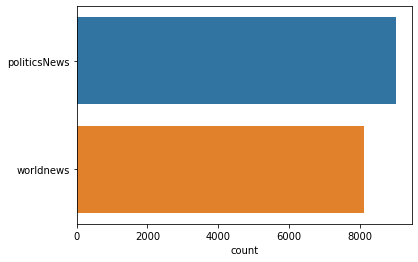

In [ ]:
subject_dis = df[df.validity==1].subject.value_counts()

sns.barplot(x=subject_dis,y=subject_dis.index)
plt.xlabel('count')
plt.show()

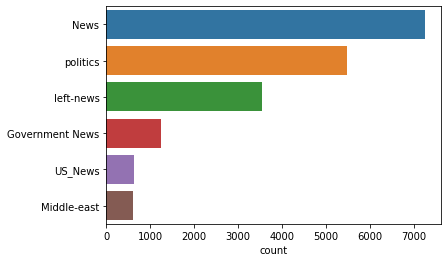

In [ ]:
subject_dis = df[df.validity==0].subject.value_counts()

sns.barplot(x=subject_dis,y=subject_dis.index)
plt.xlabel('count')
plt.show()

We also found that the dataset's subject already separate the validity of the news. We have to drop this column to avoid overfitting on the subject column.

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import *
import string
from wordcloud import WordCloud, STOPWORDS

 
stopwords = set(STOPWORDS)

In [ ]:
def word_cloud(series,title=''):
    input_words =''
    series = series.astype('string')

    for i in series:
        words = i.split(' ')
        input_words +=  " ".join([words[j].lower().strip(string.punctuation) for j in range(len(words)) if words[j]!='Comment'])+" "

    wordcloud = WordCloud(width = 3000, 
                          height = 2000,
                          random_state=1,  
                          collocations=False).generate(input_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()


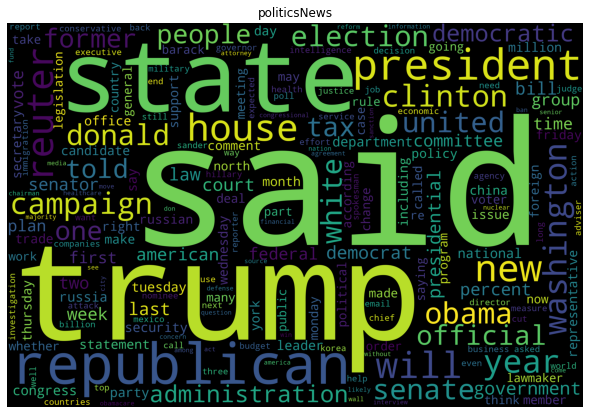

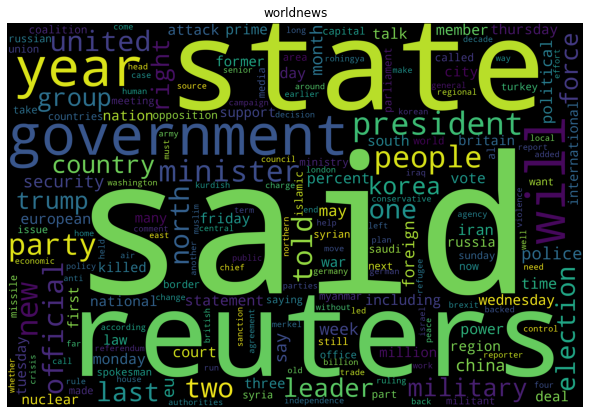

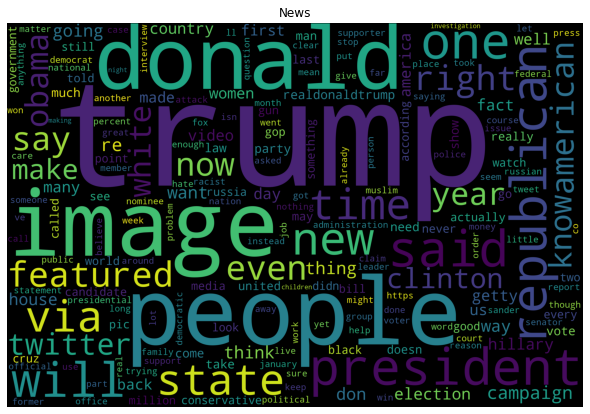

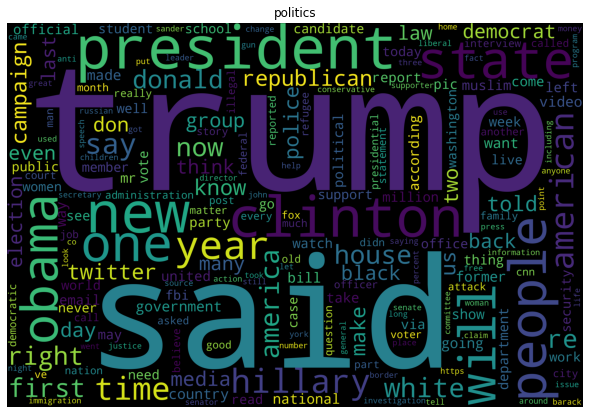

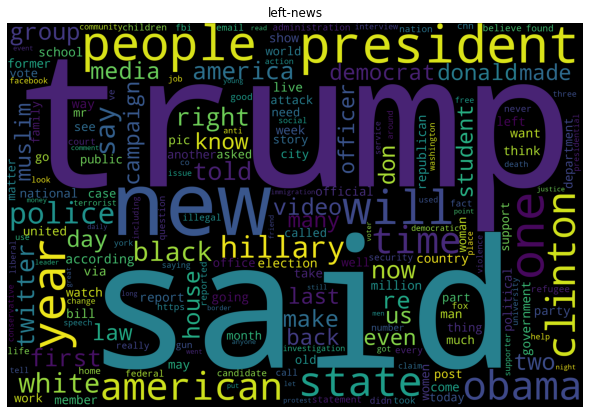

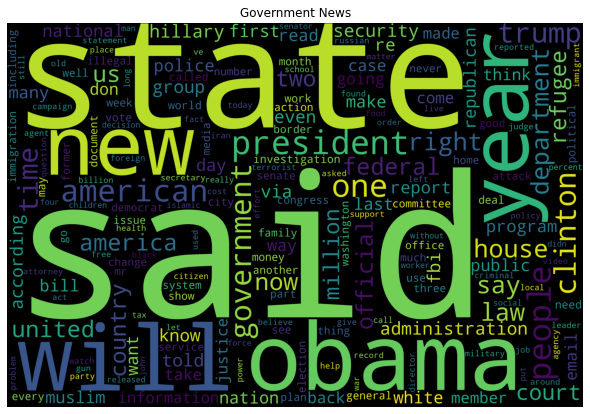

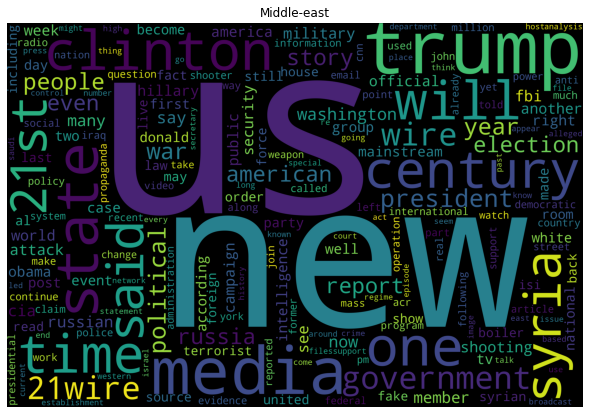

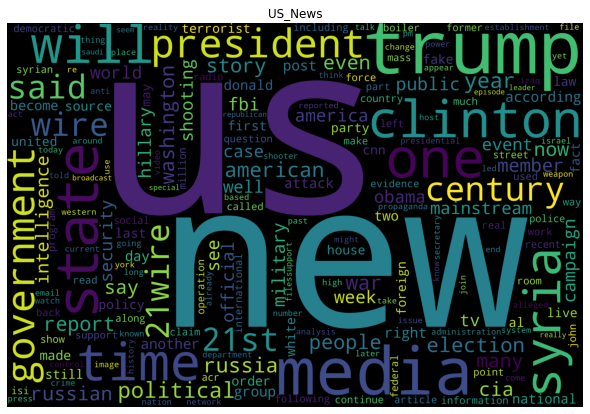

In [ ]:
for subject in df.subject.value_counts().index:
  word_cloud(df.loc[df['subject'] == subject,'text'],title=subject)

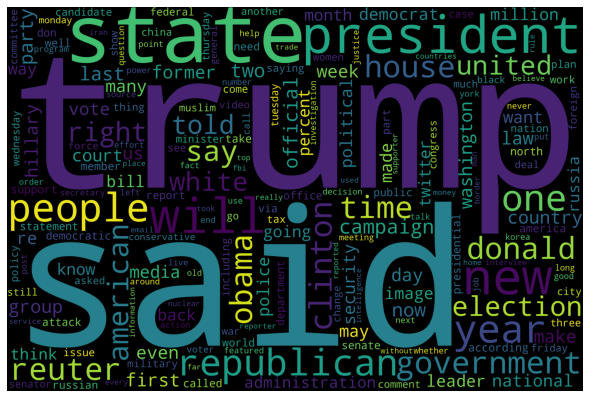

In [ ]:
word_cloud(df['text'])

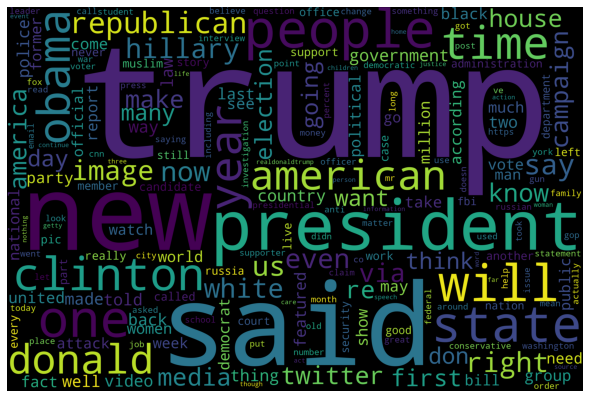

In [ ]:
word_cloud(df.loc[df['validity']==0,'text'])

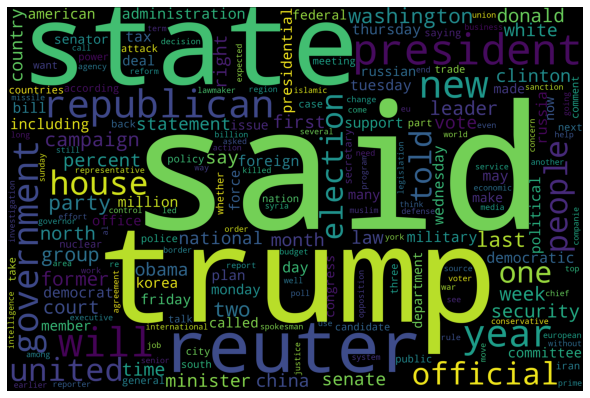

In [ ]:
word_cloud(df.loc[df['validity']==1,'text'])

it seems that there are more words about trump in the fake news than the real one. Where the fake news talks more about the people involved, the real news tend to be more generalize in talking about the country.

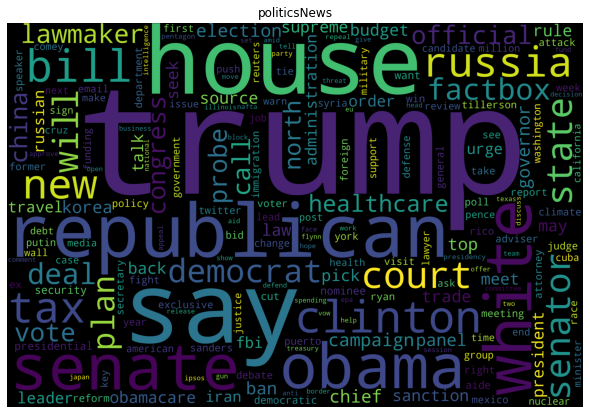

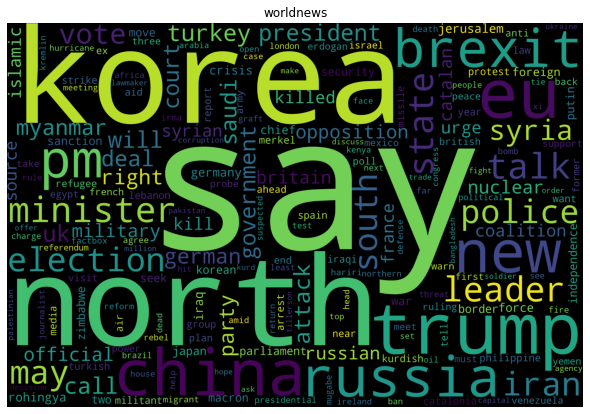

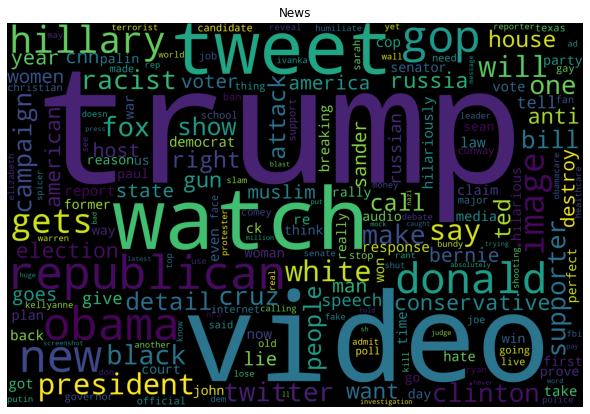

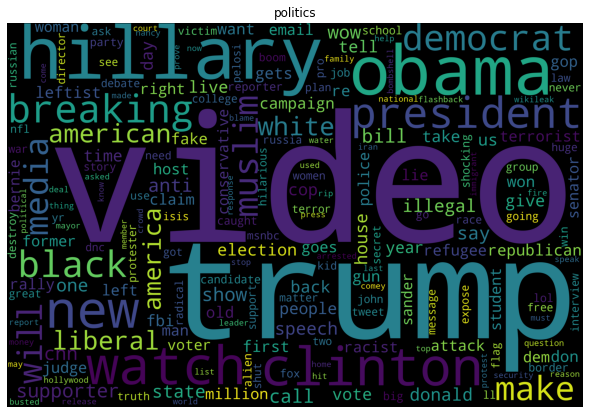

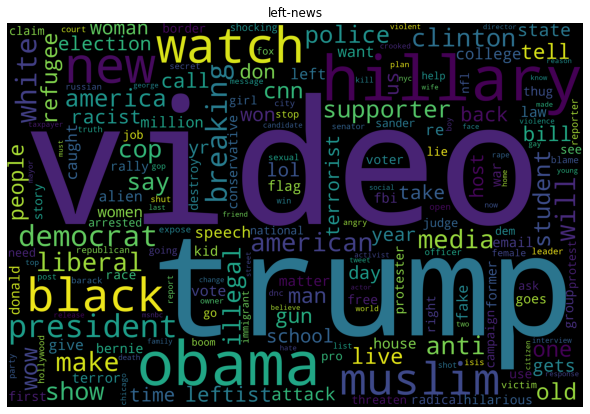

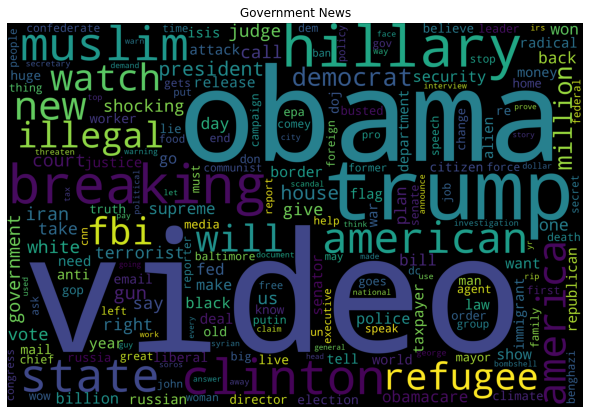

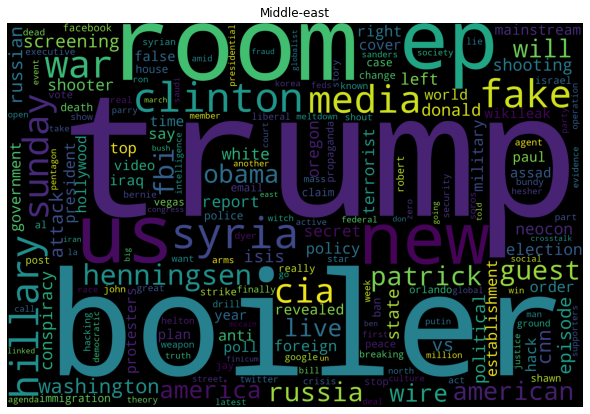

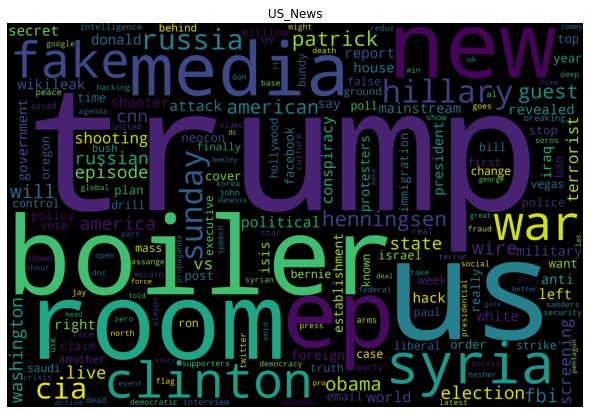

In [ ]:
for subject in df.subject.value_counts().index:
  word_cloud(df.loc[df['subject'] == subject,'title'],title=subject)

Here we can see a bigger picture of the text data on each subject, we can find some similarity and uniqueness in each subject

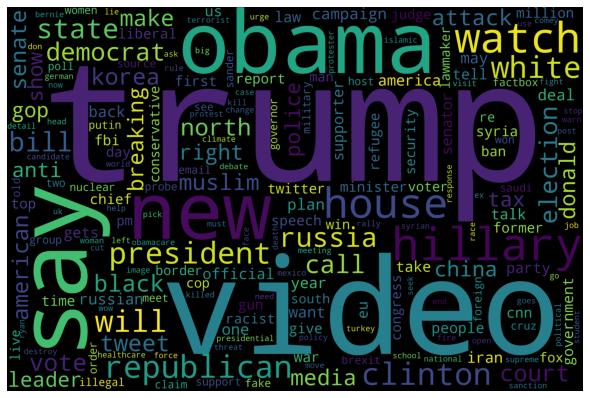

In [ ]:
word_cloud(df['title'])

Overall both news mainly talks about trump, videos, and obama

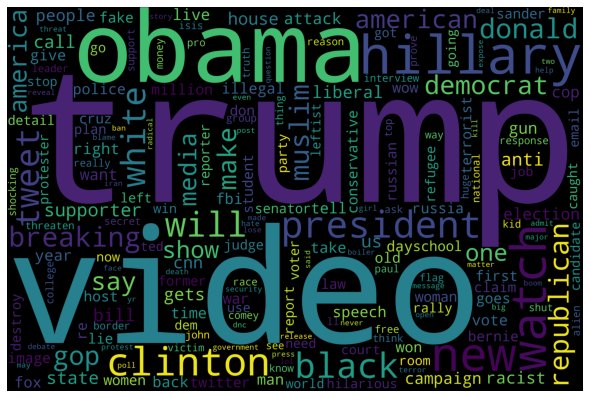

In [ ]:
word_cloud(df.loc[df['validity']==0,'title'])

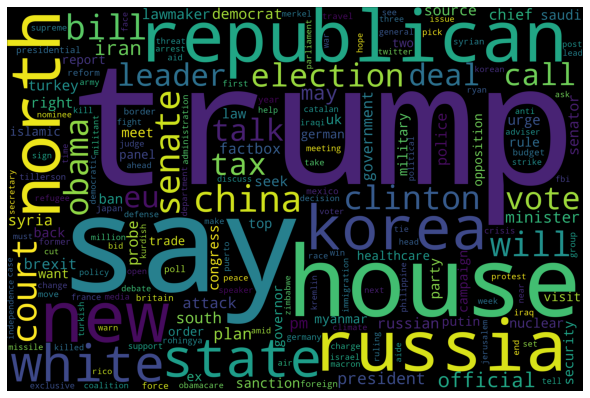

In [ ]:
word_cloud(df.loc[df['validity']==1,'title'])

from the title the real news seems to share mo common words with each other than the fake ones. The fake news also talks more about a video and social media than the real one and cover more broader index of words where the real ones follow a certain trend of words.

There are some word that shows alot compare to the other we need to clean those to avoid overdependency on that word.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
to_del = stopwords.words('english') + [''] + [x for x in string.punctuation]

def bigram(series,title=''):
    series = series.astype('string')
    to_bigrams = []
    for j in range(len(series)):
      words = word_tokenize(series.iloc[j])
      words = [word.strip(string.punctuation).lower() for word in words ]
      words = [word.strip(string.punctuation).lower() for word in words if word.strip(string.punctuation).lower() not in to_del]
      to_bigrams.append(" ".join(words).replace('"','').replace('`','').replace("'",''))
    bigrams = [j for i in to_bigrams for j in zip(i.split(" ")[:-1], i.split(" ")[1:]) ]
    bigrams = pd.Series(bigrams)
    # plt.figure(figsize=(14,14))
    sns.barplot(x=bigrams.value_counts()[:10],y=bigrams.value_counts().index[:10])
    plt.title(title)
    plt.show()
    


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


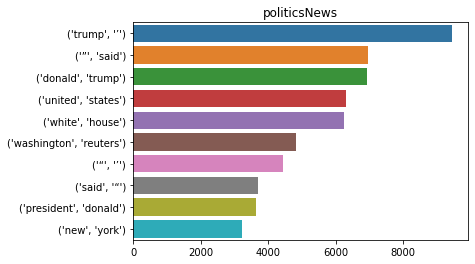

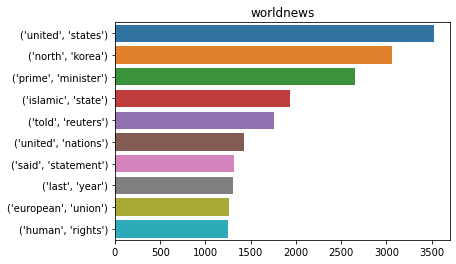

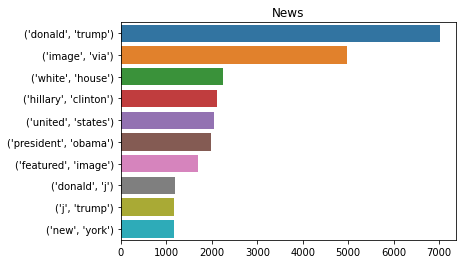

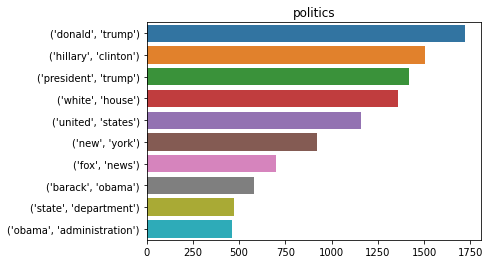

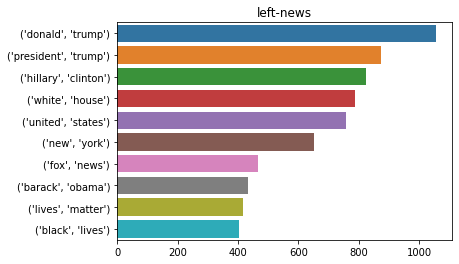

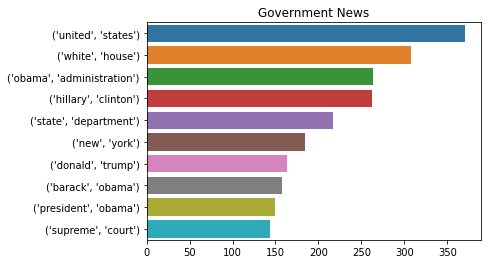

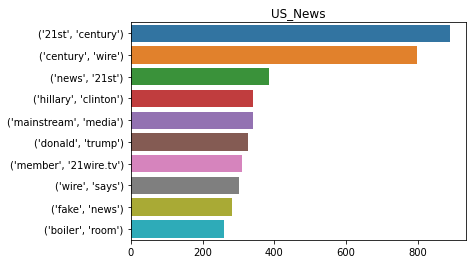

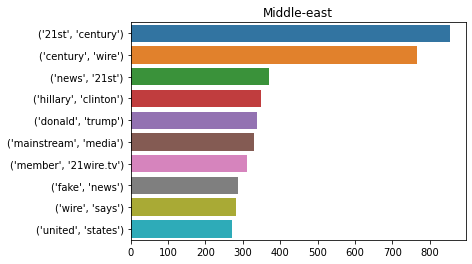

In [ ]:
for subject in df.subject.value_counts().index:
  bigram(series=df.loc[df['subject'] == subject,'text'],title=subject)

we can see that the news are dominated by politic news

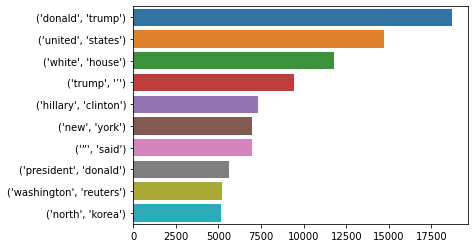

In [ ]:
bigram(series=df['text'])

the text mainly talks about trump and hilary in becoming president of united states

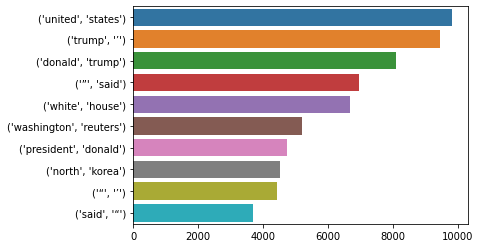

In [ ]:
bigram(series=df.loc[df['validity']==1,'text'])

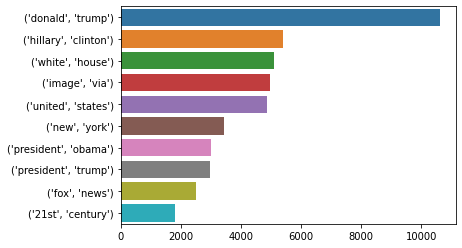

In [ ]:
bigram(series=df.loc[df['validity']==0,'text'])

There are really varied topic discussed and word used in the text between fake and real news

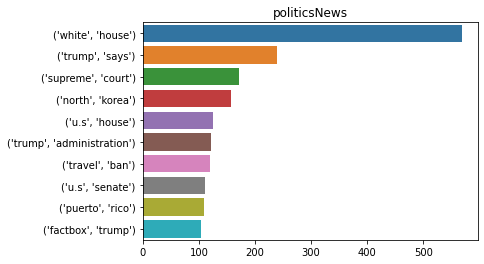

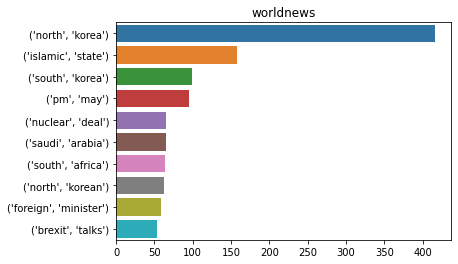

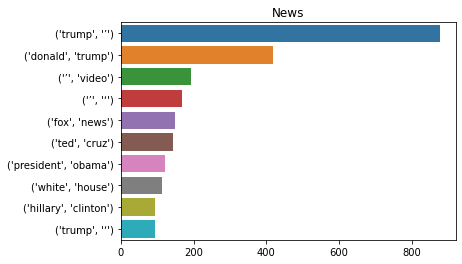

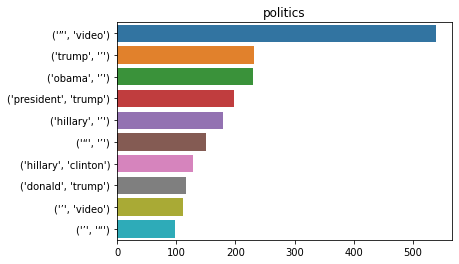

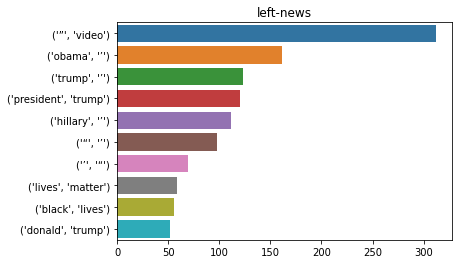

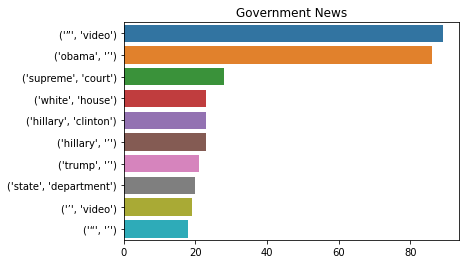

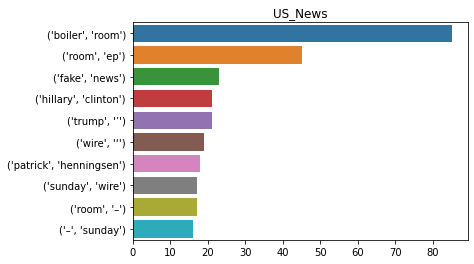

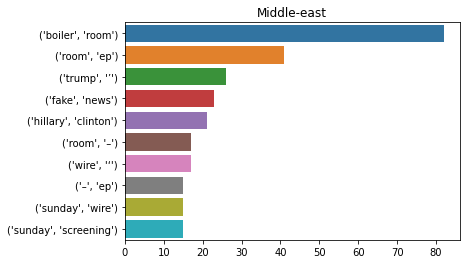

In [ ]:
for subject in df.subject.value_counts().index:
  bigram(series=df.loc[df['subject'] == subject,'title'],title=subject)

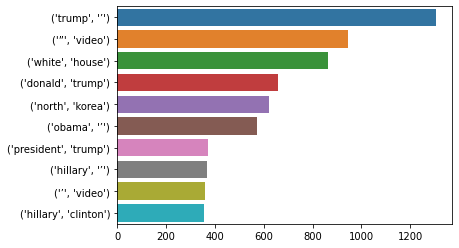

In [ ]:
bigram(series=df['title'])

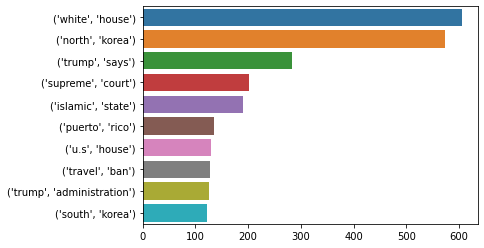

In [ ]:
bigram(series=df.loc[df['validity']==1,'title'])

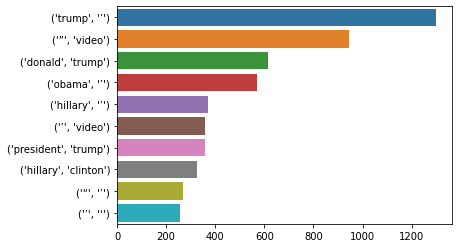

In [ ]:
bigram(series=df.loc[df['validity']==0,'title'])

In [ ]:
df.loc[df['validity']==0,'title']

The fake news mainly talks about the people involved where the real news are more generalized

In [ ]:
df.validity.value_counts()

0    18785
1    17133
Name: validity, dtype: int64

Let's see the word distribution between news

In [ ]:
from tqdm import tqdm
def text_size(df,texts='text'):
    sizes = []
    for text in tqdm(df[texts]):
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)

In [ ]:
df['len_title'] = text_size(df,texts='title')

import plotly.express as px
import plotly.graph_objects as go

fake_ = df[df['validity']==0]
true_ = df[df['validity']==1]
fig = go.Figure()
fig.add_trace(go.Box(y=list(fake_['len_title']), name='Fake',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=list(true_['len_title']), name = 'Real',
                marker_color = 'lightseagreen'))

fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'white',
        'title': 'Box plot',
        
})

fig.show()

100%|██████████| 35918/35918 [00:00<00:00, 597921.13it/s]


The title seems to have a more diversed words than the real ones. It's hard to tell if it's reasonable or not since there are possible explanation for more unique titles in the fake news since the news itself are made up it's likely to be unique than the ones based on evidence/facts .Other explanation is that there are misspelled words or more use of slang words.

In [ ]:
from tqdm import tqdm
def unique_tokens(df,texts='text'):
    unique_tokens = set()
    for text in tqdm(df[texts]):
        splited = text.split()
        for token in splited:
            unique_tokens.add(token)
    return unique_tokens

unique_tokens_fake = unique_tokens(df[df['validity']==0],texts='title')
unique_tokens_true = unique_tokens(df[df['validity']==1],texts='title')

100%|██████████| 17133/17133 [00:00<00:00, 281667.60it/s]


In [ ]:
import enchant
def check_if_exist(list_):
    d = enchant.DictWithPWL("en_US", "vocab.txt")
    count = 0
    for token in tqdm(list_):
        if not d.check(token) and not d.check(token.capitalize()):
            count+=1
    return count
count_fake = check_if_exist(unique_tokens_fake)
count_true = check_if_exist(unique_tokens_true)

100%|██████████| 20308/20308 [00:00<00:00, 31391.28it/s]


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[count_fake, len(unique_tokens_fake)-count_fake], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Fake News'), row=1, col=1)

fig.append_trace(go.Pie(values=[count_true, len(unique_tokens_true)-count_true], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Real News'), row=1, col=2)
fig.update_traces(marker=dict(colors=['red','lightblue']))
fig.show()

In [ ]:
series = df.loc[df.validity==0,'title'].astype('string')
bigrams = [j for i in series for j in zip(i.split(" ")[:-1], i.split(" ")[1:]) ]
bigrams = pd.Series(bigrams)
bigrams.value_counts()[-20:]


(HELICOPTER, RIDES)        1
(Admit, Hillary)           1
($20,000, In)              1
(CHAOS, After)             1
(Criticizing, Islam)       1
(Conservatives, Kill)      1
(trusted, Donald)          1
(Advertisers, Flee)        1
(BUSTED!, HERE’S)          1
(Miss:, “Painting)         1
(CO, Mine)                 1
(Campaign, Coverage)       1
(Defies, Critics…Rocks)    1
(A, Pair)                  1
(BARACK, Become)           1
(Flynn, While)             1
(Donor, With)              1
(, Atlanta)                1
(Men, Sexually)            1
(Supremacist, Steve)       1
dtype: int64

The decent amount of unrecognizeable words and the varied number of words can be explained by the certain number of subject mentioning. We will move on to the text to see the comparison.

In [ ]:
df['len'] = text_size(df)

import plotly.express as px
import plotly.graph_objects as go

fake_ = df[df['validity']==0]
true_ = df[df['validity']==1]
fig = go.Figure()
fig.add_trace(go.Box(y=list(fake_['len']), name='Fake',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=list(true_['len']), name = 'Real',
                marker_color = 'lightseagreen'))

fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'white',
        'title': 'Box plot',
        
})

fig.show()

The fake one seems to also have a more varied words in the text, this is interesting because we think that the real news should be more descriptive and detailed. One explanation of this is that maybe there are duplicates in the data the other that the fake news actually contains more unique words let's see if those words can be found in the dictionary.

In [ ]:
!pip install pyenchant
!apt-get install libenchant1c2a -y

     |████████████████████████████████| 55 kB 1.9 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 40 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/

In [ ]:
unique_tokens_fake = unique_tokens(df[df['validity']==0])
unique_tokens_true = unique_tokens(df[df['validity']==1])

100%|██████████| 17133/17133 [00:02<00:00, 8475.71it/s]


In [ ]:
count_fake = check_if_exist(unique_tokens_fake)
count_true = check_if_exist(unique_tokens_true)

100%|██████████| 159805/159805 [00:06<00:00, 24722.71it/s]


In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[count_fake, len(unique_tokens_fake)-count_fake], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Fake News'), row=1, col=1)

fig.append_trace(go.Pie(values=[count_true, len(unique_tokens_true)-count_true], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Real News'), row=1, col=2)
fig.update_traces(marker=dict(colors=['red','lightblue']))
fig.show()

it seems the fake news contains more uncommon word than the real one this could due to misspelling, we will try to look into it deeper.

In [ ]:
series = df.loc[df.validity==0,'text'].astype('string')
bigrams = [j for i in series for j in zip(i.split(" ")[:-1], i.split(" ")[1:]) ]
bigrams = pd.Series(bigrams)
bigrams.value_counts()[-20:]

(including, NAFTA.)         1
(Krauthammer, and)          1
(Ted, might)                1
((@EmbryEthan), January)    1
(notoriously, filthy)       1
(that, ARE)                 1
(their, cousin,)            1
(devices, the)              1
(Yorkers., It)              1
(, Fran)                    1
(spot., Hobbins)            1
(not, mine.)                1
(rapist, getting)           1
(signature, legislation)    1
(determine, politics)       1
(Card, Collection)          1
(This, (@HeyThatsMyPen))    1
(well-known, examples)      1
(v, Galloway.)              1
(happens, now,)             1
dtype: int64

from this alone we found 2 twitter tag and a misspelled this could explain and examples of the diversity of words in the fake news. 

In [ ]:
import re
def count_twitters_user(df):
    twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
    count = 0
    list_ = []
    for text in df['text']:
        count += len(re.findall(twitter_username_re, text))
    return count

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

twitter_users_fake_count = count_twitters_user(df[df['validity']==0])
twitter_users_true_count = count_twitters_user(df[df['validity']==1])
fig = go.Figure()
fig.add_trace(go.Bar(x=['Fake', 'True'],
    y=[twitter_users_fake_count, twitter_users_true_count],
    name='Twitter user name Pattern',
    marker_color='indianred')
)
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'white',
        'title': 'unique hashtags mentions in twitters',
})

fig.show()

This also explain the misspelled/slang words used since the fake news mentions more tweets than the real one.

This shows another reason of how biased our data is. From the text we can tell that the real and fake news text contains a lot of bias such as header in the real news, slang/misspelled words in fake news, twitter tags in the fake news, caps in the fake news titles. From this we have 2 choices to either clean the text and title and use both title and text or just use the title, we will try to use both text and title first and see if we can have a reasonable outcome.

In [ ]:
def try_datetime(x):
  try:
    pd.to_datetime(x)
  except:
    return x

In [ ]:
links =[x for x in df.date.apply(try_datetime) if x is not None] 

In [ ]:
links

['https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg',
 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/',
 'MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]',
 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg']

In [ ]:
to_clean = set()

In [ ]:
for x in links:
  for y in df.loc[df['date']==x,:].index.ravel():
    to_clean.add(y)

In [ ]:
df.drop(index=to_clean,inplace=True)

In [ ]:
df['date'] = pd.to_datetime(pd.to_datetime(df['date']).dt.strftime('%m/%d/%Y'))

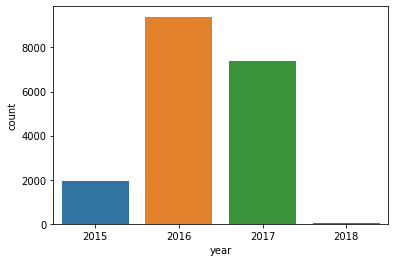

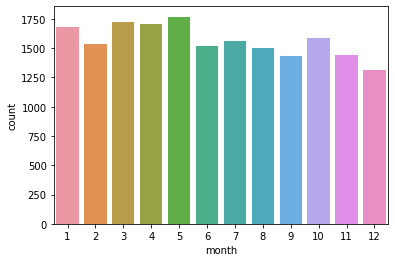

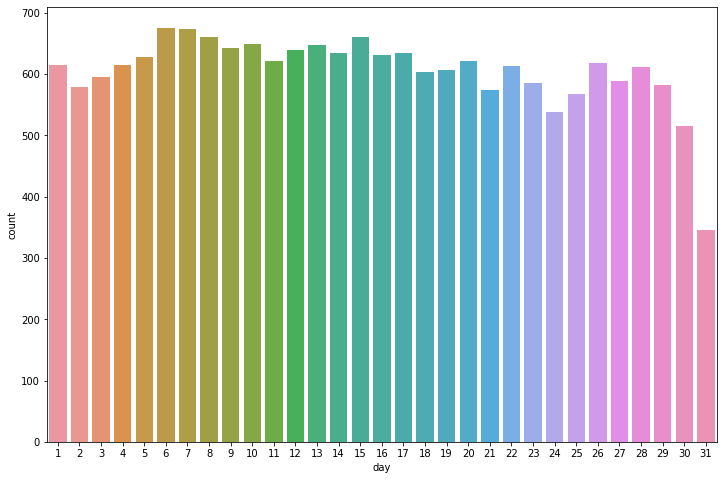

In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day

subject_dis = df[df.validity==0].year.value_counts()
sns.barplot(x=subject_dis.index,y=subject_dis)
plt.xlabel('year')
plt.ylabel('count')
plt.show()

subject_dis = df[df.validity==0].month.value_counts()
sns.barplot(x=subject_dis.index,y=subject_dis)
plt.xlabel('month')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(12,8))
subject_dis = df[df.validity==0].day.value_counts()
sns.barplot(x=subject_dis.index,y=subject_dis)
plt.xlabel('day')
plt.ylabel('count')
plt.show()



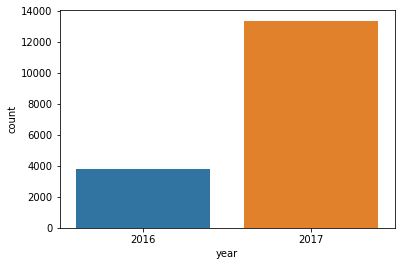

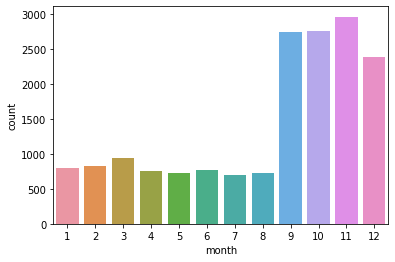

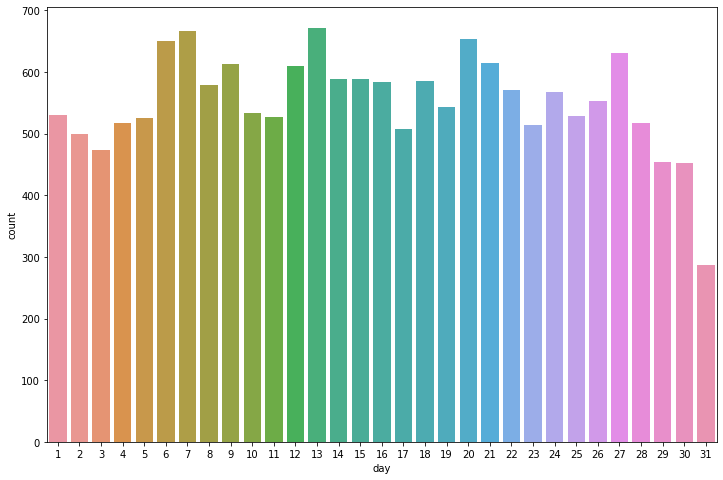

In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day

subject_dis = df[df.validity==1].year.value_counts()
sns.barplot(x=subject_dis.index,y=subject_dis)
plt.xlabel('year')
plt.ylabel('count')
plt.show()

subject_dis = df[df.validity==1].month.value_counts()
sns.barplot(x=subject_dis.index,y=subject_dis)
plt.xlabel('month')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(12,8))
subject_dis = df[df.validity==1].day.value_counts()
sns.barplot(x=subject_dis.index,y=subject_dis)
plt.xlabel('day')
plt.ylabel('count')
plt.show()



From this we can also see sharp contrast in real and fake news where the real news data shows up only between 2016-2017 and tend to be more on 9th-12th month. On the day however both real and fake news have similar amount of created news on that date. Because we want to differentiate real and fake news from the text we will be dropping this column also to avoid over dependecy on our model.

We found that the dataset contains alot of overdependency in alot of it's feature and can be dangerous for our model, we will try to use both title and text to see if our model we will be overly confident and we will consider using only the title to see if we will have a more realistic outcome.

Moving to preprocess there are 5 main things that we will consider doing drop subject, drop missing text, delete real news tags, drop year, delete duplicates. As for the feature used we will consider using both title and text or just the title.